# Colormap Data Extraction

It is not the rare case to encounter colormaps created with certain data. Sometimes values of these colormaps are required.

This program is about extracting the values which a colormap took as input. Workflow is as follows:

    - Arranging images by cropping the map and legend seperately.
    
    - At least one dimension (number of pixels in length or height) of them must be same.
    
    - Values in legend is arranged manually since min and max values are stated and amount of pixels in columns are known, column pixels will be the number of elements in the legend.
    
    - If then clause was used to predict the pixel values in certain range; logic is similar to nearest-neighbors.
    
    - Using that relationship, prediction is done to find value of the colormap from its pixels.

In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
test_img = plt.imread(r"C:\Users\Yiğit\Desktop\DS Projeler\Colormap Reconstruction\colormap_example_cropped.png")
legend_img = plt.imread(r"C:\Users\Yiğit\Desktop\DS Projeler\Colormap Reconstruction\img_legend.png")

(163, 194, 3)


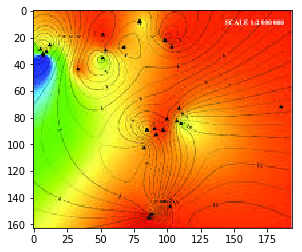

In [3]:
%matplotlib inline
plt.imshow(test_img)
print(test_img.shape)

(163, 9, 3)


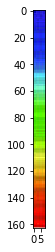

In [4]:
plt.imshow(legend_img)
print(legend_img.shape)

In [5]:
import numpy as np
legend_results = np.linspace(50.5, 43.5, num=163)
legend_results

array([50.5       , 50.45679012, 50.41358025, 50.37037037, 50.32716049,
       50.28395062, 50.24074074, 50.19753086, 50.15432099, 50.11111111,
       50.06790123, 50.02469136, 49.98148148, 49.9382716 , 49.89506173,
       49.85185185, 49.80864198, 49.7654321 , 49.72222222, 49.67901235,
       49.63580247, 49.59259259, 49.54938272, 49.50617284, 49.46296296,
       49.41975309, 49.37654321, 49.33333333, 49.29012346, 49.24691358,
       49.2037037 , 49.16049383, 49.11728395, 49.07407407, 49.0308642 ,
       48.98765432, 48.94444444, 48.90123457, 48.85802469, 48.81481481,
       48.77160494, 48.72839506, 48.68518519, 48.64197531, 48.59876543,
       48.55555556, 48.51234568, 48.4691358 , 48.42592593, 48.38271605,
       48.33950617, 48.2962963 , 48.25308642, 48.20987654, 48.16666667,
       48.12345679, 48.08024691, 48.03703704, 47.99382716, 47.95061728,
       47.90740741, 47.86419753, 47.82098765, 47.77777778, 47.7345679 ,
       47.69135802, 47.64814815, 47.60493827, 47.5617284 , 47.51

In [6]:
legend_results.shape

(163,)

In [7]:
legend_img

array([[[0.05882353, 0.04705882, 0.69411767],
        [0.        , 0.00784314, 0.6       ],
        [0.0627451 , 0.02745098, 0.7607843 ],
        ...,
        [0.08627451, 0.04705882, 0.8117647 ],
        [0.10588235, 0.07058824, 0.8039216 ],
        [0.03921569, 0.        , 0.8156863 ]],

       [[0.09019608, 0.07058824, 0.78039217],
        [0.03137255, 0.03529412, 0.7019608 ],
        [0.17254902, 0.14117648, 0.85490197],
        ...,
        [0.16470589, 0.12941177, 0.8784314 ],
        [0.13333334, 0.10196079, 0.8156863 ],
        [0.05490196, 0.00784314, 0.8156863 ]],

       [[0.1764706 , 0.14901961, 0.9098039 ],
        [0.15294118, 0.14509805, 0.8784314 ],
        [0.2       , 0.16078432, 0.91764706],
        ...,
        [0.1764706 , 0.13333334, 0.92156863],
        [0.13333334, 0.09411765, 0.8509804 ],
        [0.05490196, 0.        , 0.8509804 ]],

       ...,

       [[0.9882353 , 0.        , 0.01176471],
        [0.972549  , 0.        , 0.        ],
        [0.9607843 , 0

Taking just one column of the legend:

In [8]:
import scipy.misc as smp
from PIL import Image

#legend_slice = smp.toimage(legend_img[:,0,:])       # Create a PIL image
#legend_slice.show()

In [9]:
legend_img.shape

(163, 9, 3)

In [10]:
legend_img = legend_img[:,5,:]

In [11]:
legend_img.shape

(163, 3)

In [12]:
test_img.shape

(163, 194, 3)

## Checking for similar values of legend with map

In [13]:
sensitivity = 0.05

In [14]:
data_ = np.zeros((test_img.shape[0],test_img.shape[1]))
pixel_true_amount = 0

for a in range(0,(test_img.shape[1])):
    for b in range(0,(test_img.shape[0])):
        for l_index in range(0,(legend_img.shape[0])):
            pixel_true_amount = 0
            for c in range(0,3):
                if (legend_img[l_index,c] - sensitivity) <= test_img[b,a,c] <= (legend_img[l_index,c] + sensitivity):
                    pixel_true_amount += 1
                    if pixel_true_amount == 3:
                        data_[b,a] = legend_results[l_index]
                        pixel_true_amount = 0
                        break
                else:
                    break

In [15]:
np.set_printoptions(threshold=np.inf)

In [16]:
print(data_.flatten())

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         44.62345679  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 45.05555556  0.          0.         45.05555556  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         

## Writing Data to a File

In [17]:
f= open(r"C:\Users\Yiğit\Desktop\colormap_values.csv", "w+") # w+ in first execution, x in further executions

f.write(np.array_str(data_))         

f.close()  

f=open(r"C:\Users\Yiğit\Desktop\colormap_values.csv", "r")

if f.mode == 'r':

    y_test_ = f.read()
    
f.close()

Now data must be adjusted manually by entering to the file (notepad++ is recommended):

1) Delete "[" and "]" characters

2) Delete double spaces (might be okay not to do so)

In [19]:
f=open(r"C:\Users\Yiğit\Desktop\colormap_values.csv")
array = []
for line in f: # read rest of lines
        array.append([float(x) for x in line.split()])
        
f.close()

In [20]:
y=np.array([np.array(xi) for xi in array])
y.shape

(5379,)

In [21]:
y.flatten("f")

array([array([0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0.]),
       array([ 0.        ,  0.        ,  0.        , 44.62345679,  0.        ,
        0.        ]),
       array([0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0.]),
       array([45.05555556,  0.        ,  0.        , 45.05555556,  0.        ,
        0.        ]),
       array([0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0.]),
       array([ 0.        ,  0.        ,  0.        ,  0.        , 44.66666667,
       44.66666667]),
       array([0., 0., 0., 0., 0., 0.]),
       array([ 0.        ,  0.        ,  0.        , 44.32098765, 44.14814815,
       44.32098765]),
       array([ 0.        , 44.14814815,  0.  

In [22]:
df = pd.DataFrame(y)
df.head()

,0
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,"[0.0, 0.0, 0.0, 44.62345679, 0.0, 0.0]"


In [23]:
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5369,5370,5371,5372,5373,5374,5375,5376,5377,5378
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 44.62345679, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",...,"[43.71604938, 43.71604938, 43.71604938, 43.716...","[43.71604938, 43.71604938, 43.71604938, 43.716...","[43.71604938, 43.71604938, 43.71604938, 43.716...","[43.71604938, 43.71604938, 43.71604938, 43.716...","[43.71604938, 43.71604938, 43.71604938, 43.716...","[43.71604938, 43.71604938, 43.71604938, 43.716...","[43.71604938, 43.71604938, 43.71604938, 43.716...","[43.71604938, 43.71604938, 43.71604938, 43.716...","[43.71604938, 43.71604938, 44.0617284, 43.6728...","[44.14814815, 43.5]"


## Arranging the DataFrame to 2D Flat Version

In [24]:
lst = []
for n in df.values:
    for s in n:
        lst.append(s)

In [25]:
data = pd.DataFrame(lst)

In [26]:
d = data.transpose()

In [27]:
arr = d.values.copy()
arr.resize(4463*9,1)
t = pd.DataFrame(arr.T)
t

,0,1,2,3,4,5,6,7,8,9,...,40157,40158,40159,40160,40161,40162,40163,40164,40165,40166
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
t.dropna(axis=1, inplace=True)
t

,0,1,2,3,4,5,6,7,8,9,...,40157,40158,40159,40160,40161,40162,40163,40164,40165,40166
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
arr = t.values.copy()
arr.resize(163,194)
t = pd.DataFrame(arr)
t

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,44.018519,0.000000,0.000000,43.759259,43.975309,44.407407,0.000000,44.450617,44.018519,44.018519
1,43.888889,44.407407,44.018519,43.716049,0.000000,45.228395,44.969136,0.000000,44.882716,44.839506,...,45.271605,0.000000,44.407407,0.000000,44.320988,44.018519,44.364198,0.000000,44.018519,0.000000
2,43.975309,0.000000,0.000000,44.148148,0.000000,43.716049,0.000000,43.629630,0.000000,0.000000,...,44.839506,45.228395,0.000000,45.358025,45.271605,44.493827,43.759259,0.000000,44.364198,44.018519
3,44.018519,44.493827,0.000000,44.018519,44.407407,0.000000,0.000000,0.000000,44.018519,44.018519,...,0.000000,0.000000,0.000000,44.839506,44.969136,45.271605,0.000000,45.358025,45.271605,0.000000
4,44.148148,0.000000,44.493827,0.000000,44.450617,44.450617,43.759259,0.000000,44.450617,0.000000,...,46.179012,45.703704,0.000000,0.000000,0.000000,45.185185,0.000000,0.000000,45.228395,0.000000
5,45.271605,45.314815,45.228395,0.000000,0.000000,44.450617,44.234568,44.450617,44.407407,44.364198,...,44.061728,0.000000,50.067901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,45.919753,45.746914,0.000000,0.000000,0.000000,45.271605,0.000000,44.925926,44.882716,44.407407,...,44.407407,44.450617,0.000000,44.320988,0.000000,0.000000,49.030864,48.771605,47.561728,0.000000
7,0.000000,44.925926,45.314815,45.746914,0.000000,0.000000,0.000000,0.000000,0.000000,45.271605,...,44.234568,44.450617,44.407407,44.450617,44.450617,0.000000,44.450617,44.450617,44.450617,0.000000
8,49.419753,0.000000,0.000000,0.000000,45.444444,0.000000,0.000000,0.000000,0.000000,45.746914,...,0.000000,0.000000,0.000000,0.000000,44.580247,44.450617,0.000000,0.000000,44.450617,44.450617
9,44.407407,44.450617,44.450617,0.000000,0.000000,48.209877,0.000000,46.481481,0.000000,45.530864,...,44.882716,44.666667,44.450617,0.000000,44.709877,44.796296,0.000000,44.882716,0.000000,0.000000


Forward filling zero values:

In [30]:
t.replace(to_replace=0, method='ffill')

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,44.018519,0.000000,0.000000,43.759259,43.975309,44.407407,0.000000,44.450617,44.018519,44.018519
1,43.888889,44.407407,44.018519,43.716049,0.000000,45.228395,44.969136,0.000000,44.882716,44.839506,...,45.271605,0.000000,44.407407,43.759259,44.320988,44.018519,44.364198,44.450617,44.018519,44.018519
2,43.975309,44.407407,44.018519,44.148148,0.000000,43.716049,44.969136,43.629630,44.882716,44.839506,...,44.839506,45.228395,44.407407,45.358025,45.271605,44.493827,43.759259,44.450617,44.364198,44.018519
3,44.018519,44.493827,44.018519,44.018519,44.407407,43.716049,44.969136,43.629630,44.018519,44.018519,...,44.839506,45.228395,44.407407,44.839506,44.969136,45.271605,43.759259,45.358025,45.271605,44.018519
4,44.148148,44.493827,44.493827,44.018519,44.450617,44.450617,43.759259,43.629630,44.450617,44.018519,...,46.179012,45.703704,44.407407,44.839506,44.969136,45.185185,43.759259,45.358025,45.228395,44.018519
5,45.271605,45.314815,45.228395,44.018519,44.450617,44.450617,44.234568,44.450617,44.407407,44.364198,...,44.061728,45.703704,50.067901,44.839506,44.969136,45.185185,43.759259,45.358025,45.228395,44.018519
6,45.919753,45.746914,45.228395,44.018519,44.450617,45.271605,44.234568,44.925926,44.882716,44.407407,...,44.407407,44.450617,50.067901,44.320988,44.969136,45.185185,49.030864,48.771605,47.561728,44.018519
7,45.919753,44.925926,45.314815,45.746914,44.450617,45.271605,44.234568,44.925926,44.882716,45.271605,...,44.234568,44.450617,44.407407,44.450617,44.450617,45.185185,44.450617,44.450617,44.450617,44.018519
8,49.419753,44.925926,45.314815,45.746914,45.444444,45.271605,44.234568,44.925926,44.882716,45.746914,...,44.234568,44.450617,44.407407,44.450617,44.580247,44.450617,44.450617,44.450617,44.450617,44.450617
9,44.407407,44.450617,44.450617,45.746914,45.444444,48.209877,44.234568,46.481481,44.882716,45.530864,...,44.882716,44.666667,44.450617,44.450617,44.709877,44.796296,44.450617,44.882716,44.450617,44.450617


Backward filling the zeros at first row:

In [31]:
t.replace(to_replace=0, method='bfill')

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,43.888889,44.407407,44.018519,43.716049,44.407407,45.228395,44.969136,43.629630,44.882716,44.839506,...,44.018519,45.228395,44.407407,43.759259,43.975309,44.407407,44.364198,44.450617,44.018519,44.018519
1,43.888889,44.407407,44.018519,43.716049,44.407407,45.228395,44.969136,43.629630,44.882716,44.839506,...,45.271605,45.228395,44.407407,45.358025,44.320988,44.018519,44.364198,45.358025,44.018519,44.018519
2,43.975309,44.493827,44.493827,44.148148,44.407407,43.716049,43.759259,43.629630,44.018519,44.018519,...,44.839506,45.228395,50.067901,45.358025,45.271605,44.493827,43.759259,45.358025,44.364198,44.018519
3,44.018519,44.493827,44.493827,44.018519,44.407407,44.450617,43.759259,44.450617,44.018519,44.018519,...,46.179012,45.703704,50.067901,44.839506,44.969136,45.271605,49.030864,45.358025,45.271605,44.450617
4,44.148148,45.314815,44.493827,45.746914,44.450617,44.450617,43.759259,44.450617,44.450617,44.364198,...,46.179012,45.703704,50.067901,44.320988,44.450617,45.185185,49.030864,48.771605,45.228395,44.450617
5,45.271605,45.314815,45.228395,45.746914,45.444444,44.450617,44.234568,44.450617,44.407407,44.364198,...,44.061728,44.450617,50.067901,44.320988,44.450617,44.450617,49.030864,48.771605,47.561728,44.450617
6,45.919753,45.746914,45.314815,45.746914,45.444444,45.271605,44.320988,44.925926,44.882716,44.407407,...,44.407407,44.450617,44.407407,44.320988,44.450617,44.450617,49.030864,48.771605,47.561728,44.450617
7,49.419753,44.925926,45.314815,45.746914,45.444444,48.209877,44.320988,46.481481,44.407407,45.271605,...,44.234568,44.450617,44.407407,44.450617,44.450617,44.450617,44.450617,44.450617,44.450617,44.450617
8,49.419753,44.450617,44.450617,44.450617,45.444444,48.209877,44.320988,46.481481,44.407407,45.746914,...,44.882716,44.666667,44.450617,46.179012,44.580247,44.450617,45.617284,44.882716,44.450617,44.450617
9,44.407407,44.450617,44.450617,44.450617,44.450617,48.209877,44.320988,46.481481,44.407407,45.530864,...,44.882716,44.666667,44.450617,46.179012,44.709877,44.796296,45.617284,44.882716,44.839506,44.796296


In [32]:
final_image = smp.toimage(t)       # Create a PIL image
final_image.show()   

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


### How map of values looks in heatmap:

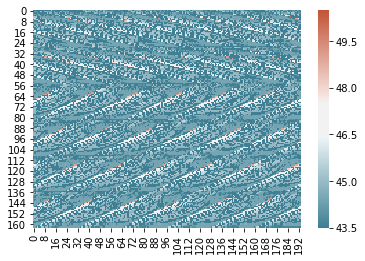

In [33]:
import seaborn as sns

cmap = sns.diverging_palette(220, 20, sep=40, as_cmap=True)
ax = sns.heatmap(t, vmax=50.5, vmin=43.5, center=47, cmap=cmap)

### How manually arranged legend values look in heatmap:

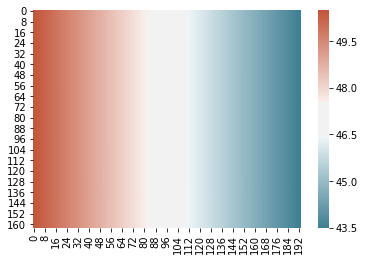

In [34]:
legend_illustration = np.linspace(50.5, 43.5, num=194)
legend_illustration = np.array(163*[legend_illustration])
ax = sns.heatmap(legend_illustration, cmap=cmap)

# Conclusion

-Data was extracted successfully.
    
-The reconstructed map can be different than the original because of different methods were used to construct them.
    
-Further improvements on the problem can be done with Machine Learning and Neural Network.